In [1]:
#import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import joblib
import pickle
from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore

In [2]:
#load data
df=pd.read_csv(r"C:\Users\Hxtreme\Jupyter_Notebook_Learning\Final_Project\Dataset\Insurance_RC_CP.csv")
df.head()

,Policy_ID,Customer_Age,Gender,Policy_Type,Annual_Income,Property_Age,Claim_History,Risk_Score,Premium_Amount,Claim_Amount,Fraudulent_Claim,Claim_to_Income,Age_Risk_Factor
0,POL100000,56,Female,Health,91465.94,0,2,Medium,426.0,14134.62,0,0.154534,1.0
1,POL100001,69,Female,Property,99375.03,3,1,Low,552.0,4075.14,0,0.041008,1.2
2,POL100002,46,Male,Health,79249.71,0,1,Low,356.0,1382.87,0,0.017450,1.0
3,POL100003,32,Male,Auto,78744.75,3,1,High,628.0,24902.32,0,0.316241,1.0
4,POL100004,60,Male,Life,51210.11,0,2,Medium,534.0,14411.28,0,0.281415,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Policy_ID         100000 non-null  object 
 1   Customer_Age      100000 non-null  int64  
 2   Gender            100000 non-null  object 
 3   Policy_Type       100000 non-null  object 
 4   Annual_Income     100000 non-null  float64
 5   Property_Age      100000 non-null  int64  
 6   Claim_History     100000 non-null  int64  
 7   Risk_Score        100000 non-null  object 
 8   Premium_Amount    100000 non-null  float64
 9   Claim_Amount      100000 non-null  float64
 10  Fraudulent_Claim  100000 non-null  int64  
 11  Claim_to_Income   100000 non-null  float64
 12  Age_Risk_Factor   100000 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 9.9+ MB


In [4]:
df.columns=df.columns.str.lower()
df.head()

,policy_id,customer_age,gender,policy_type,annual_income,property_age,claim_history,risk_score,premium_amount,claim_amount,fraudulent_claim,claim_to_income,age_risk_factor
0,POL100000,56,Female,Health,91465.94,0,2,Medium,426.0,14134.62,0,0.154534,1.0
1,POL100001,69,Female,Property,99375.03,3,1,Low,552.0,4075.14,0,0.041008,1.2
2,POL100002,46,Male,Health,79249.71,0,1,Low,356.0,1382.87,0,0.017450,1.0
3,POL100003,32,Male,Auto,78744.75,3,1,High,628.0,24902.32,0,0.316241,1.0
4,POL100004,60,Male,Life,51210.11,0,2,Medium,534.0,14411.28,0,0.281415,1.0


In [5]:
df.describe()

,customer_age,annual_income,property_age,claim_history,premium_amount,claim_amount,fraudulent_claim,claim_to_income,age_risk_factor
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,43.500270,60005.893630,5.009450,1.200650,489.615271,14720.406191,0.219750,0.283608,1.045838
std,14.970933,19691.895922,6.326223,1.092209,134.177830,11230.253771,0.414079,0.279388,0.084063
min,18.000000,15000.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,1.000000
25%,31.000000,46513.822500,0.000000,0.000000,402.000000,5008.815000,0.000000,0.083554,1.000000
50%,43.000000,59922.690000,1.000000,1.000000,502.000000,10863.240000,0.000000,0.193065,1.000000
75%,56.000000,73378.797500,10.000000,2.000000,594.000000,27362.365000,0.000000,0.417342,1.000000
max,69.000000,152334.530000,19.000000,10.000000,702.000000,41740.810000,1.000000,2.570321,1.200000


In [6]:
df.isnull().sum()

policy_id           0
customer_age        0
gender              0
policy_type         0
annual_income       0
property_age        0
claim_history       0
risk_score          0
premium_amount      0
claim_amount        0
fraudulent_claim    0
claim_to_income     0
age_risk_factor     0
dtype: int64

In [7]:
duplicates=df[df.duplicated()]
duplicates

,policy_id,customer_age,gender,policy_type,annual_income,property_age,claim_history,risk_score,premium_amount,claim_amount,fraudulent_claim,claim_to_income,age_risk_factor


In [8]:
#target
df['claim_amount'].value_counts()

claim_amount
1000.00     4597
29632.97       3
7273.73        3
10374.40       3
4476.28        3
            ... 
1422.49        1
3945.15        1
13635.62       1
11213.85       1
31378.00       1
Name: count, Length: 93625, dtype: int64

In [5]:
#drop policy_id
udf=df.drop(columns=['policy_id'])
udf.head()

,customer_age,gender,policy_type,annual_income,property_age,claim_history,risk_score,premium_amount,claim_amount,fraudulent_claim,claim_to_income,age_risk_factor
0,56,Female,Health,91465.94,0,2,Medium,426.0,14134.62,0,0.154534,1.0
1,69,Female,Property,99375.03,3,1,Low,552.0,4075.14,0,0.041008,1.2
2,46,Male,Health,79249.71,0,1,Low,356.0,1382.87,0,0.017450,1.0
3,32,Male,Auto,78744.75,3,1,High,628.0,24902.32,0,0.316241,1.0
4,60,Male,Life,51210.11,0,2,Medium,534.0,14411.28,0,0.281415,1.0


In [6]:
#split numeric/categoric columns
num_col=[col for col in udf.columns if udf[col].dtype!='object']
cat_col=[col for col in udf.columns if udf[col].dtype=='object']

In [11]:
#EDA

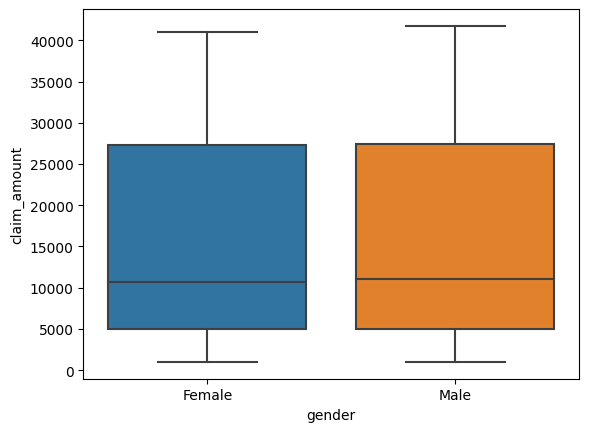

In [12]:
sns.boxplot(data=udf, y='claim_amount',x='gender')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


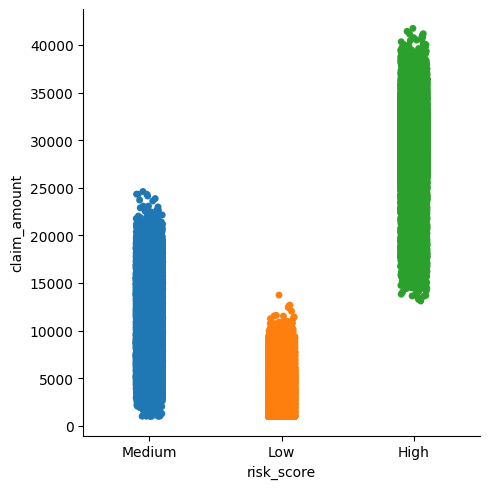

In [13]:
sns.catplot(data=udf,x='risk_score',y="claim_amount", hue="risk_score")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

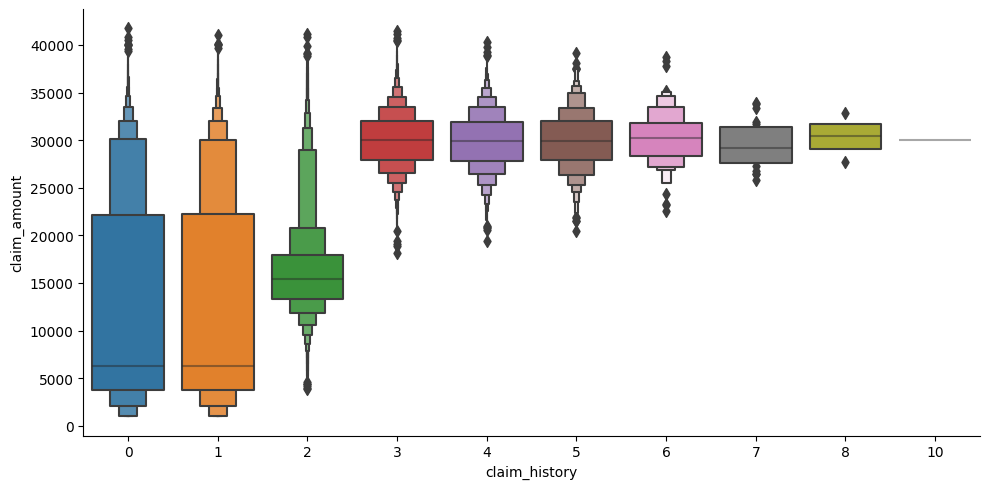

In [14]:
sns.catplot(data=df, x="claim_history", y="claim_amount", kind="boxen", aspect=2, height=5)
plt.show()

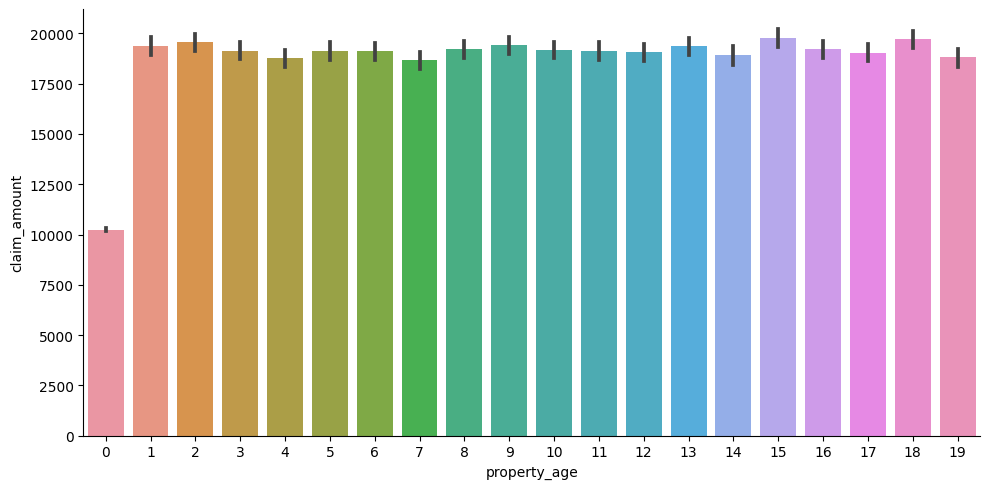

In [15]:
sns.catplot(data=df, x="property_age", y="claim_amount", kind="bar", aspect=2, height=5)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a

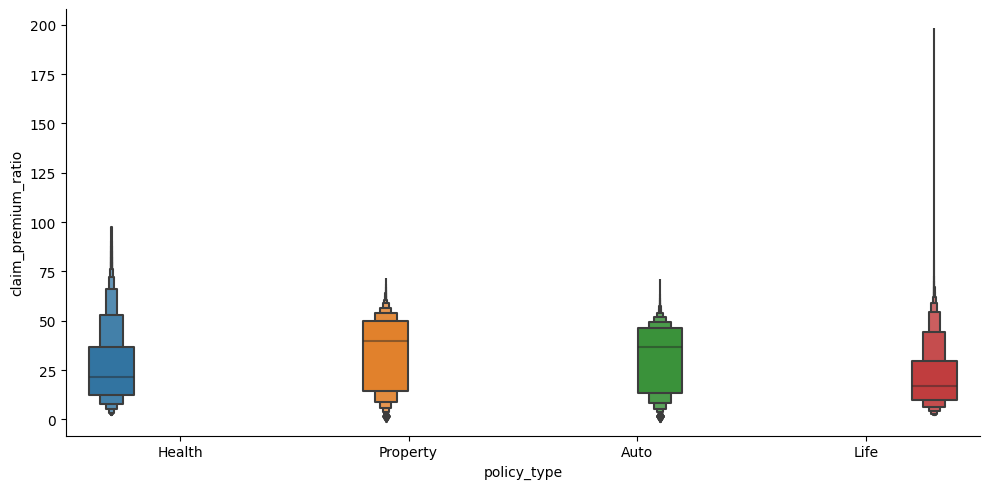

In [16]:
df["claim_premium_ratio"] = df["claim_amount"] / df["premium_amount"]

sns.catplot(data=df, x="policy_type", y="claim_premium_ratio", hue="policy_type", kind="boxen", aspect=2, height=5)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


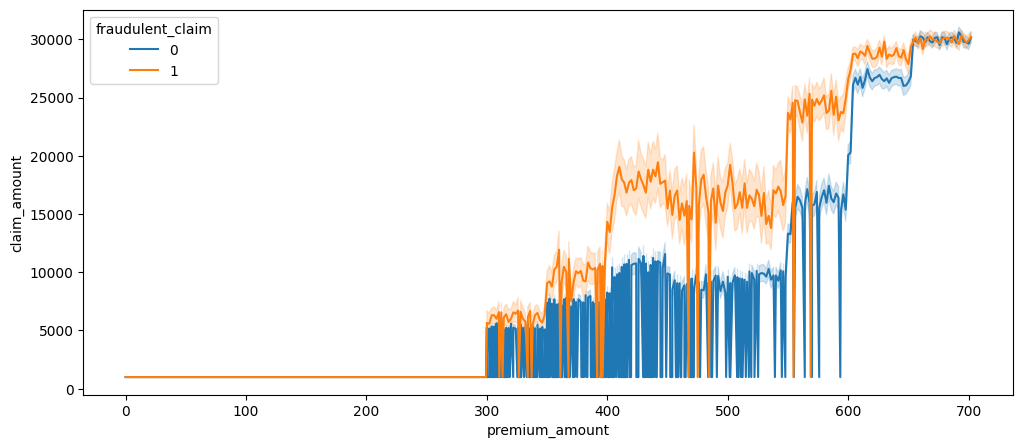

In [17]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x="premium_amount", y="claim_amount", hue="fraudulent_claim")
plt.show()

In [7]:
# Label Encoding
udf["risk_score"] = LabelEncoder().fit_transform(udf["risk_score"])

In [8]:
def one_hot_encode_columns(udf, columns):
    return pd.get_dummies(udf, columns=columns, prefix=columns, drop_first=False)

In [9]:
# Apply one-hot encoding to 'Gender' and 'Policy_Type'
udf = one_hot_encode_columns(udf, ['gender', 'policy_type'])

In [10]:
udf.head()

,customer_age,annual_income,property_age,claim_history,risk_score,premium_amount,claim_amount,fraudulent_claim,claim_to_income,age_risk_factor,gender_Female,gender_Male,policy_type_Auto,policy_type_Health,policy_type_Life,policy_type_Property
0,56,91465.94,0,2,2,426.0,14134.62,0,0.154534,1.0,True,False,False,True,False,False
1,69,99375.03,3,1,1,552.0,4075.14,0,0.041008,1.2,True,False,False,False,False,True
2,46,79249.71,0,1,1,356.0,1382.87,0,0.017450,1.0,False,True,False,True,False,False
3,32,78744.75,3,1,0,628.0,24902.32,0,0.316241,1.0,False,True,True,False,False,False
4,60,51210.11,0,2,2,534.0,14411.28,0,0.281415,1.0,False,True,False,False,True,False


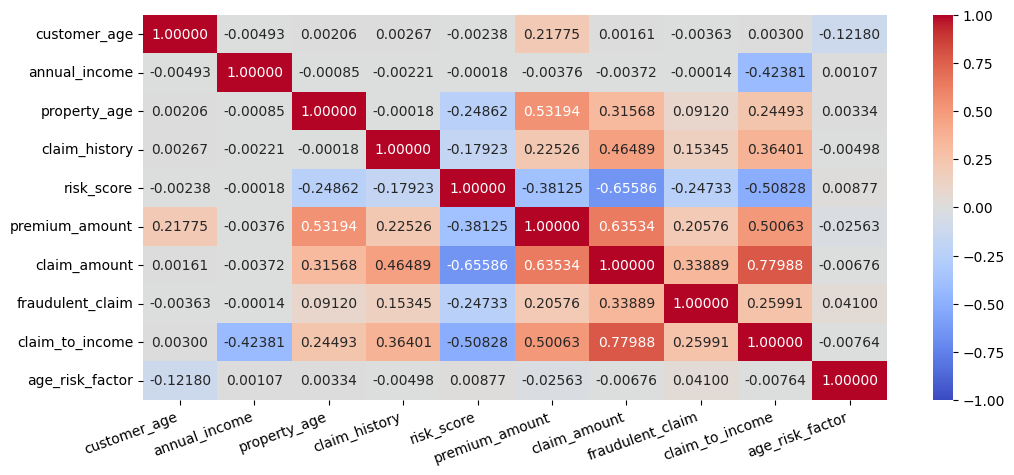

In [22]:
plt.figure(figsize=(12,5))
sns.heatmap(udf.select_dtypes(include="number").corr(), annot=True,fmt=".5f",vmin=-1, vmax=1,cmap="coolwarm")
plt.xticks(rotation=20,ha="right")
plt.show()

In [11]:
# Separate features (X) and target (y)
x = udf.drop(columns=["claim_amount"])
y = udf["claim_amount"]

In [12]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
# feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [15]:
#Store results
results = []

In [27]:
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
y_pred = lr.predict(x_test_scaled)

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

results.append({
    "Model": "Linear Regression",
    "Mean Absolute Error": round(MAE, 2),
    "Mean Squared Error": round(MSE, 2),
    "Root Mean Squared Error": round(RMSE, 2),
    "R² Score": round(R2, 4)
})

In [28]:
ridge = Ridge()
ridge.fit(x_train_scaled, y_train)
y_pred = ridge.predict(x_test_scaled)

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

results.append({
    "Model": "Ridge Regression",
    "Mean Absolute Error": round(MAE, 2),
    "Mean Squared Error": round(MSE, 2),
    "Root Mean Squared Error": round(RMSE, 2),
    "R² Score": round(R2, 4)
})


In [29]:
lasso = Lasso()
lasso.fit(x_train_scaled, y_train)
y_pred = lasso.predict(x_test_scaled)

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

results.append({
    "Model": "Lasso Regression",
    "Mean Absolute Error": round(MAE, 2),
    "Mean Squared Error": round(MSE, 2),
    "Root Mean Squared Error": round(RMSE, 2),
    "R² Score": round(R2, 4)
})


In [30]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train_scaled, y_train)
y_pred = dtr.predict(x_test_scaled)

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

results.append({
    "Model": "Decision Tree",
    "Mean Absolute Error": round(MAE, 2),
    "Mean Squared Error": round(MSE, 2),
    "Root Mean Squared Error": round(RMSE, 2),
    "R² Score": round(R2, 4)
})


In [16]:
rfr = RandomForestRegressor()
rfr.fit(x_train_scaled, y_train)
y_pred = rfr.predict(x_test_scaled)

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

results.append({
    "Model": "Random Forest",
    "Mean Absolute Error": round(MAE, 2),
    "Mean Squared Error": round(MSE, 2),
    "Root Mean Squared Error": round(RMSE, 2),
    "R² Score": round(R2, 4)
})


In [32]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train_scaled, y_train)
y_pred = gbr.predict(x_test_scaled)

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

results.append({
    "Model": "Gradient Boosting",
    "Mean Absolute Error": round(MAE, 2),
    "Mean Squared Error": round(MSE, 2),
    "Root Mean Squared Error": round(RMSE, 2),
    "R² Score": round(R2, 4)
})


In [33]:
results_df = pd.DataFrame(results).sort_values(by="R² Score", ascending=False)
display(results_df)

,Model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R² Score
4,Random Forest,44.81,18086.83,134.49,0.9999
3,Decision Tree,118.22,57351.85,239.48,0.9995
5,Gradient Boosting,746.21,1304440.67,1142.12,0.9897
0,Linear Regression,3442.16,20369179.25,4513.22,0.8396
1,Ridge Regression,3442.19,20369131.82,4513.22,0.8396
2,Lasso Regression,3442.42,20368859.11,4513.19,0.8396


In [17]:
# Feature order (15 columns):
# Age, Annual_Income, Property_Age, Claim_History,risk_score, Premium_Amount, Fraudulent_Claim,
# Gender_Female, Gender_Male,
# Policy_Type_Auto, Policy_Type_Health, Policy_Type_Life, Policy_Type_Property,
# claim_to_income, age_risk_factor

samples = {
    "Sample 1 (Actual: ₹14,134.62)": np.array([56, 91465.94, 0, 2, 2, 426, 0, 0.154534, 1.0,
                                               1, 0, 0, 1, 0, 0]),

    "Sample 2 (Actual: ₹29,507.18)": np.array([20, 59717.7, 12, 0, 0, 604, 0, 0.4941, 1.2,
                                               0, 1, 0, 0, 0, 1]),

    "Sample 3 (Actual: ₹4075.14)": np.array([69, 99375.03, 3, 1, 1, 552, 0, 0.04100, 1.2,
                                               1, 0, 0, 0, 1, 0])
}

for label, sample in samples.items():
    scaled = scaler.transform(sample.reshape(1, -1))
    predicted = rfr.predict(scaled)[0]
    print(f"{label} → Predicted: ₹{predicted:,.2f}")

Sample 1 (Actual: ₹14,134.62) → Predicted: ₹14,104.53
Sample 2 (Actual: ₹29,507.18) → Predicted: ₹29,473.86
Sample 3 (Actual: ₹4075.14) → Predicted: ₹4,076.82


C:\Users\Hxtreme\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Hxtreme\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Hxtreme\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [39]:
udf.head()

,customer_age,annual_income,property_age,claim_history,risk_score,premium_amount,claim_amount,fraudulent_claim,claim_to_income,age_risk_factor,gender_Female,gender_Male,policy_type_Auto,policy_type_Health,policy_type_Life,policy_type_Property
0,56,91465.94,0,2,2,426.0,14134.62,0,0.154534,1.0,True,False,False,True,False,False
1,69,99375.03,3,1,1,552.0,4075.14,0,0.041008,1.2,True,False,False,False,False,True
2,46,79249.71,0,1,1,356.0,1382.87,0,0.017450,1.0,False,True,False,True,False,False
3,32,78744.75,3,1,0,628.0,24902.32,0,0.316241,1.0,False,True,True,False,False,False
4,60,51210.11,0,2,2,534.0,14411.28,0,0.281415,1.0,False,True,False,False,True,False


In [21]:
#model pickle
filename=r'C:\Users\Hxtreme\Jupyter_Notebook_Learning\Final_Project\Models\claim_prediction_rfr.pkl'

In [22]:
pickle.dump(rfr, open(filename,'wb'))

In [23]:
loaded_model=pickle.load(open(r'C:\Users\Hxtreme\Jupyter_Notebook_Learning\Final_Project\Models\claim_prediction_rfr.pkl','rb'))

In [24]:
joblib.dump(scaler, r'C:\Users\Hxtreme\Jupyter_Notebook_Learning\Final_Project\Models\scaler_cp.pkl')

['C:\\Users\\Hxtreme\\Jupyter_Notebook_Learning\\Final_Project\\Models\\scaler_cp.pkl']